# Практика
0. [Импорты](#0-bullet)
1. [Скачайте данные по ссылке.](#1-bullet)
2. [Исключите признаки, которые на ваш взгляд, могут привести к переобучению (например, id).](#2-bullet)
3. [Заполним пустоты.](#3-bullet) 
4. [Преобразуйте категориальные признаки с помощью sklearn.preprocessing.OneHotEncoder, а некатегориальные с помощью sklearn.preprocessing.StandardScaler (на следующем занятии расскажем, зачем это нужно)](#4-bullet)
5. [Разделите выборку на train и test.](#5-bullet)
6. [Обучите модели логистической регрессии и KNN, посчитайте все метрики классификации, которые были упомянуты на занятии, сделайте выводы.](#6-bullet)
7. [Подберите гиперпараметры для обоих моделей с помощью RandomizedSearchCV, напишите, почему, как вы думаете, эти параметры подошли.](#7-bullet)
8. [Посчитайте метрики для новых моделей, также сделайте выводы.](#8-bullet)
9. [Тестирование модели](#9-bullet)
10. [Общие выводы](#10-bullet)


### Импорты

In [77]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt



## 1. Скачайте данные по ссылке. <a class="anchor" id="1-bullet"></a>

In [78]:
df_data = pd.read_csv("train.csv")

df_data.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [79]:
# Смотрим статистику по датафрейму
df_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [80]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df_data[pd.isna(df_data)==False].shape

(891, 12)

## 2. Исключите признаки, которые на ваш взгляд, могут привести к переобучению (например, id). <a class="anchor" id="2-bullet"></a>

In [82]:
# Исходя из статистики, для предовтр переобучения удаляем те поля, которые по количеству уникальных значений
# близки к общему количеству записей
# в данном случае это "PassengerId", "Name", "Ticket"
# также удалим три строчки с Nan в полях Embarked и Fare

df_data.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1, inplace=True)
df_data.drop(df_data[pd.isna(df_data["Embarked"])].index, axis=0, inplace=True)
df_data.drop(df_data[pd.isna(df_data["Fare"])].index, axis=0, inplace=True)

df_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [83]:
# также удаляем дубликат
df_data = df_data[df_data.duplicated()==False]

In [84]:
df_data.shape

(778, 8)

## 3. Заполним пустоты. <a class="anchor" id="3-bullet"></a>

In [85]:
df_data_age_avg = int(df_data["Age"].mean())
df_data.loc[pd.isna(df_data["Age"]), "Age"] = df_data_age_avg

## 4. Преобразуйте категориальные признаки с помощью sklearn.preprocessing.OneHotEncoder.  а некатегориальные с помощью sklearn.preprocessing.StandardScaler (на следующем занятии расскажем, зачем это нужно)<a class="anchor" id="4-bullet"></a>

### Преобразование OneHotEncoder

In [86]:
# оперделяем колонки для трансформации OneHotEncoder и удаляем из общего DF для преобразования и обратной вставки
categ = ["Sex", "Embarked", 'Pclass', 'SibSp', 'Parch']

# применяем метод OneHotEncoder для тренировочного и тестового наборов
ohe = OneHotEncoder(drop='first')
data_ohe = ohe.fit_transform(df_data[categ].values)


In [87]:
# получаем DF из преобразованных данных для тренировочного и тестового наборов
df_ohe = pd.DataFrame(data_ohe.toarray(), columns=ohe.get_feature_names_out())
df_data.drop(categ, axis=1, inplace=True)

df_data_ohe = df_data.join(df_ohe, how ="inner")

## 5. Разделите выборку на train и test.. <a class="anchor" id="5-bullet"></a>

In [88]:
df_train, df_test = train_test_split(df_data, test_size=0.7, random_state=12345)

features_train = df_train.drop('Survived', axis=1) 
features_test = df_test.drop('Survived', axis=1) 

target_train = df_train['Survived'] 
target_test = df_test['Survived'] 

print(f"Размер features_train: {features_train.shape}")
print(f"Размер features_test: {features_test.shape}")


Размер features_train: (233, 2)
Размер features_test: (545, 2)


<AxesSubplot: >

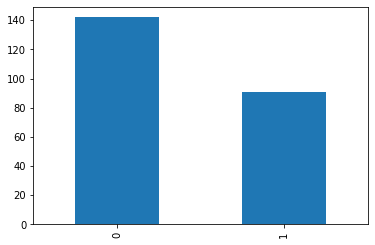

In [89]:
target_train.value_counts().plot(kind='bar')

### Выводы

- Дисбаланс классов имеется существенный. Для улучшения качества обучения модели от дисбаланса надо избавиться

### Преобразование StandardScaler

In [90]:
# Выделим спискок для признаков для масштабирования (признаки с уникальными значениями более 10 )
numeric = ['Age', 'Fare']
# Создаем объект для масштабирования и обучаем его
scaler_train = StandardScaler()
scaler_train.fit(features_train[numeric])

scaler_test = StandardScaler()
scaler_test.fit(features_test[numeric])

features_train[numeric] = scaler_train.transform(features_train[numeric])
features_test[numeric] = scaler_test.transform(features_test[numeric])

In [91]:
features_train.head(4)

,Age,Fare
449,1.633610,-0.127774
44,-0.872291,-0.473996
671,0.038946,0.201293
712,1.329864,0.201293


## 6. Обучите модели логистической регрессии и KNN, посчитайте все метрики классификации, которые были упомянуты на занятии, сделайте выводы. <a class="anchor" id="5-bullet"></a>

## 7. Подберите гиперпараметры для обоих моделей с помощью RandomizedSearchCV, напишите, почему, как вы думаете, эти параметры подошли.. <a class="anchor" id="7-bullet"></a>

### Обучаем модель Логистической регрессии

In [92]:
# выбрал лучший параметр для Логистической регрессии через GridSearchCV
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

model_lr = LogisticRegression(random_state=42)

# Search for best hyperparameters f1
lregressor_params = {'solver':solver}
grid_f1 = GridSearchCV(model_lr, 
                    lregressor_params,
                    cv=5,
                    verbose=0,
                    scoring='f1')
grid_f1.fit(features_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_lr, 
                    lregressor_params,
                    cv=5,
                    verbose=0,
                    scoring='accuracy')
grid_acc.fit(features_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_lr, 
                    lregressor_params,
                    cv=5,
                    verbose=0,
                    scoring='roc_auc')
grid_roc.fit(features_train, target_train)

print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'solver': 'liblinear'}: f1 = 0.39747480106100797
{'solver': 'liblinear'}: accuracy = 0.6566142460684551
{'solver': 'newton-cg'}: roc_auc = 0.68171218275574


### Обучаем модель КНН

In [93]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2, 3, 4 , 5, 6, 7, 8], 
                  'weights': ['uniform','distance', 'callable'],
                  'p':[1, 2, 5, 7]}]

model_knn = KNeighborsClassifier()

# Search for best hyperparameters f1
grid_f1 = GridSearchCV(model_knn, 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=0,  
                      scoring='f1')
grid_f1.fit(features_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_knn, 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=0,  
                      scoring='accuracy')
grid_acc.fit(features_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_knn, 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=0,  
                      scoring='roc_auc')
grid_roc.fit(features_train, target_train)


print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}: f1 = 0.5405439005439006
{'n_neighbors': 6, 'p': 5, 'weights': 'uniform'}: accuracy = 0.6649398704902867
{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}: roc_auc = 0.6679518480108316


### Выводы

1. Судя по результатам лучший показатель f1-меры дала модель KNeighbors =  f1 = 0.54
2. Однако ROC_AUC лучше у LogisticRegression roc_auc = 0.68
4. accuracy в случае дисбалансов классов теряет свою информативность и на нее не стоит полагаться.
5. Посмотрим на работу деревянных моделей , может с ними результа получится лучше.

## 8. Посчитайте метрики для новых моделей, также сделайте выводы. <a class="anchor" id="8-bullet"></a>

### Обучаем модель Случайного леса

In [94]:
# Define our candidate hyperparameters
max_deth_values = range(1, 11)
max_n_estimators = range(1, 100, 10)
rforest_params = {'max_depth':max_deth_values, "n_estimators": max_n_estimators}

model_rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')

# Search for best hyperparameters f1
grid_f1 = GridSearchCV(model_rfc, 
                      rforest_params, 
                      cv=2,
                      verbose=0,  
                      scoring='f1')
grid_f1.fit(features_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_rfc, 
                      rforest_params, 
                      cv=2,
                      verbose=0,  
                      scoring='accuracy')
grid_acc.fit(features_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_rfc, 
                      rforest_params, 
                      cv=2,
                      verbose=0,  
                      scoring='roc_auc')
grid_roc.fit(features_train, target_train)


print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'max_depth': 1, 'n_estimators': 1}: f1 = 0.5915015294587047
{'max_depth': 3, 'n_estimators': 31}: accuracy = 0.6695770704391394
{'max_depth': 3, 'n_estimators': 61}: roc_auc = 0.6835374566238008


### Обучаем модель Дерева Решений

In [95]:
# Define our candidate hyperparameters
max_deth_values = range(1, 11)
tree_params = {'max_depth':max_deth_values}

model_dtc = DecisionTreeClassifier(random_state=12345)

# Search for best hyperparameters f1
grid_f1 = GridSearchCV(model_dtc, 
                      tree_params, 
                      cv=5,
                      verbose=0,  
                      scoring='f1')
grid_f1.fit(features_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_dtc, 
                      tree_params, 
                      cv=5,
                      verbose=0,  
                      scoring='accuracy')
grid_acc.fit(features_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_dtc, 
                      tree_params, 
                      cv=5,
                      verbose=0,  
                      scoring='roc_auc')
grid_roc.fit(features_train, target_train)


print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'max_depth': 1}: f1 = 0.6132650547284693
{'max_depth': 8}: accuracy = 0.6653098982423682
{'max_depth': 2}: roc_auc = 0.7016150289516896


### Выводы

1. Судя по результатам лучший показатель f1-меры дала модель DecisionTree =  f1 = 0.61
2. Эта модель также показала лучший показатель roc_auc = 0.70 (главное больше 0.5 т.е. точность вышк чем случайная)
3. Помимо прочего эта модель легче и быстрее RandomForest, что тоже неплохо. Т.е. лучший результат за "меньшие деньги"
4. f1 и Roc_auc утойчивы к несбалансированным классам и при этом адекватно показывают соотнесение precision и recall
5. Выбираем модель DecisionTree

## 9. Тестирование модели <a class="anchor" id="9-bullet"></a>

### Протестируем выбранную модель с выбранным методом ухода от дисбаланса (class_weight='balanced')

In [96]:
model_rfc = RandomForestClassifier(random_state=12345, max_depth=2, n_estimators=41, class_weight='balanced')
model_rfc.fit(features_train, target_train)

predict_model_rfc = model_rfc.predict(features_test)

print(f"Метрика f1_score равна: {f1_score(target_test, predict_model_rfc)}")

Метрика f1_score равна: 0.5898989898989898


In [97]:
probabilities_test = model_rfc.predict_proba(features_test)
auc_roc = roc_auc_score(target_test, probabilities_test[:, 1])

print(f"Метрика auc_roc равна: {auc_roc}")

Метрика auc_roc равна: 0.6798477143330938


### Построим график roc_auc

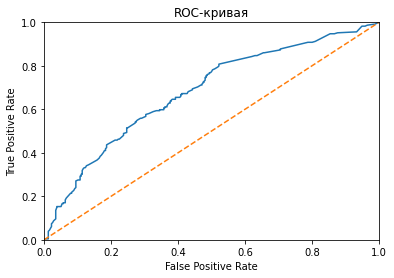

In [98]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test[:, 1])

plt.figure()

plt.plot(fpr, tpr, linestyle='-')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")


plt.show()

## Общие выводы <a class="anchor" id="10-bullet"></a>

1. При тестировании на тестовых данных модель также дает стабильный резульат близкий к первоначальному результату.
2. Модель годиться чтобы ее использовать. 
3. Однако имеет смысл улучшить результ путем работы с признаками, с балнасировкой классов и тд